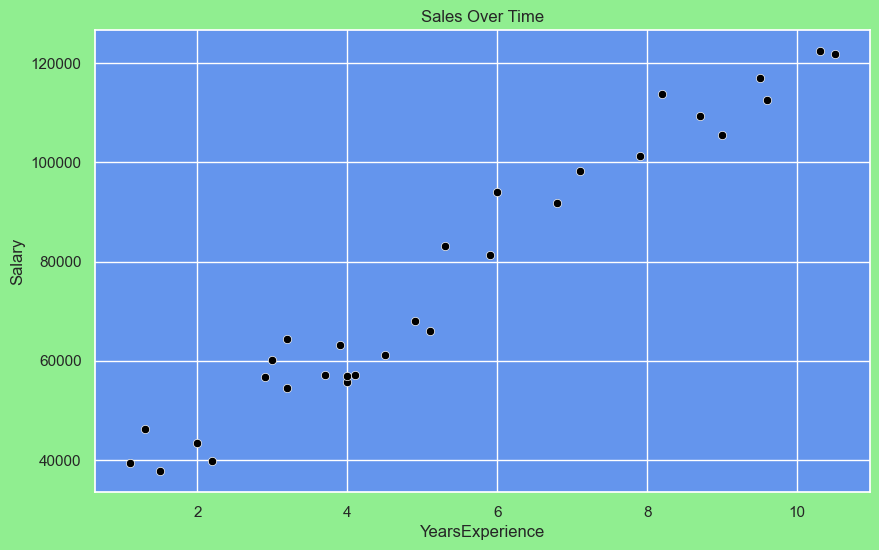

Converged at iteration 81: MSE = 36149670.118163


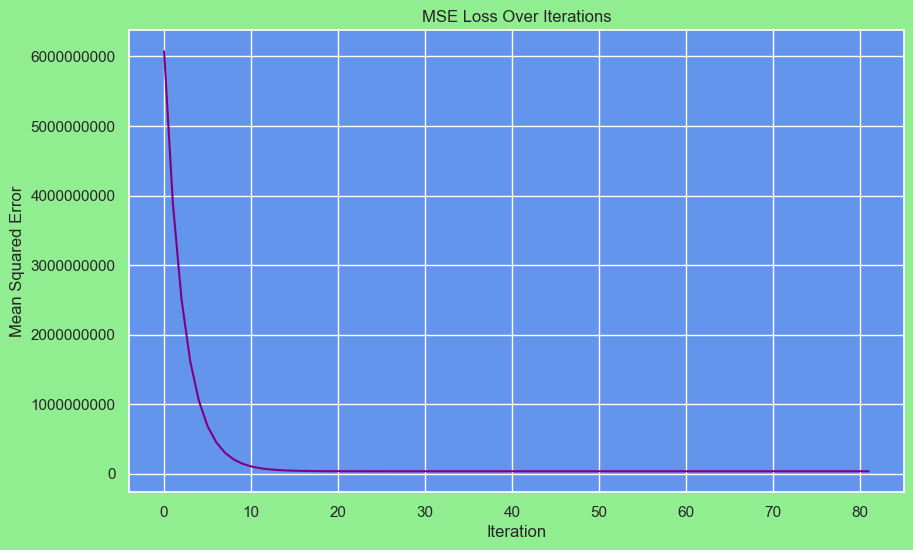

Test MSE: 12823411.2003


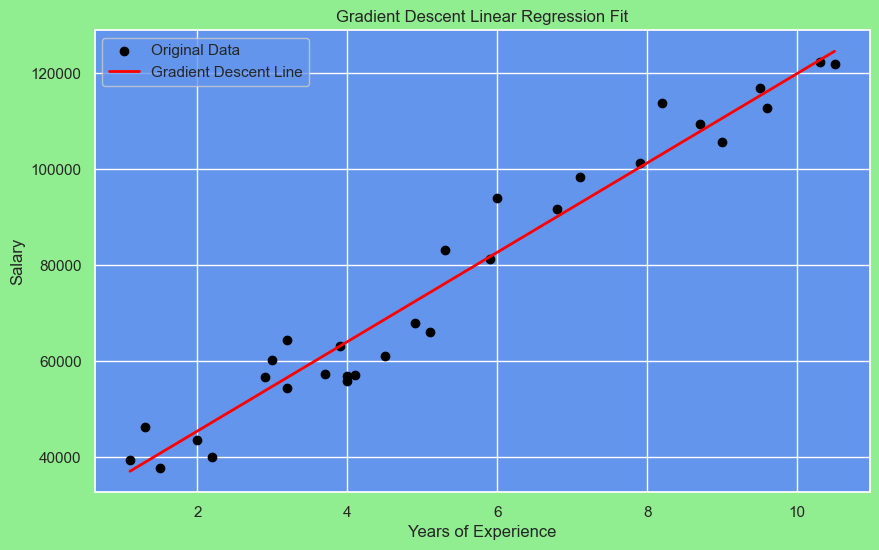

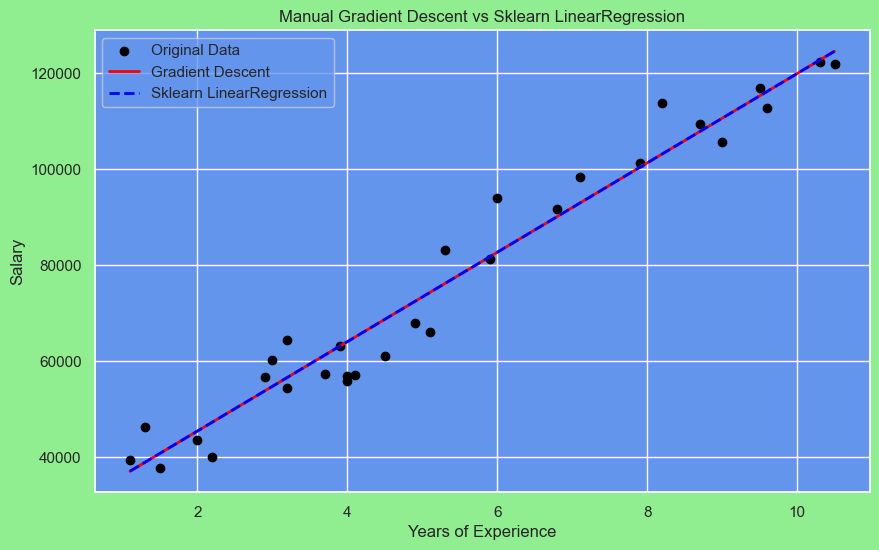

MSE (Manual Gradient Descent): 12823411.2003
MSE (Sklearn LinearRegression): 12823412.2981


In [120]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, model_selection, preprocessing, metrics, datasets
from sklearn.metrics import mean_squared_error

## Get dataset
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head(10)

## Create a graph on the dataset

plt.figure(figsize=(10, 6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'lightgreen'})
sns.scatterplot(data=df_sal, color='black', x="YearsExperience", y="Salary")
plt.title("Sales Over Time")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

## Prepare data

X = df_sal[['YearsExperience']].values
y = df_sal[['Salary']].values

## Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling (Z-score normalization)

scaler_standard = preprocessing.StandardScaler()
X_train = scaler_standard.fit_transform(X_train)
X_test = scaler_standard.transform(X_test)  # Use transform, not fit_transform on test set

## Gradient Descent Function

def gradient_descent(X, y, learning_rate=0.01, max_iter=1000, tolerance=1e-6):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept
    theta = np.zeros((2, 1))  # Initialize weights
    loss_history = []
    
    for i in range(max_iter):
        predictions = X_b.dot(theta)
        error = predictions - y
        gradients = 2/m * X_b.T.dot(error)
        theta -= learning_rate * gradients

        mse = np.mean(error ** 2)
        loss_history.append(mse)
        # if len(loss_history) > 1:
        #     print(loss_history[-2] - loss_history[-1])

        # Early stopping check
        if i > 0 and abs(loss_history[-2] - loss_history[-1]) < tolerance:
            print(f"Converged at iteration {i}: MSE = {mse:.6f}")
            break

    return theta, loss_history


## Run gradient descent

theta_final, loss_history = gradient_descent(X_train, y_train, learning_rate=0.1, max_iter=1000, tolerance=1e-6)

## Plot MSE over iterations

plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='purple')
plt.title("MSE Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.ticklabel_format(style='plain') #switching from the default scientific notation
plt.show()

## Evaluate on Test Set
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_test_b.dot(theta_final)
test_mse = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE: {test_mse:.4f}")

## Plot the original data with the regression line

# Generate a smooth range of X values for the regression line (in original scale)
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Scale X_plot using the same scaler
X_plot_scaled = scaler_standard.transform(X_plot)

# Add bias term for prediction
X_plot_b = np.c_[np.ones((X_plot_scaled.shape[0], 1)), X_plot_scaled]

# Predict y using gradient descent theta
y_plot = X_plot_b.dot(theta_final)

# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Original Data')

# Plot regression line
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Gradient Descent Line')

plt.title("Gradient Descent Linear Regression Fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


## Gradient Descent Line vs Sklearn LinearRegression Line

# 1. Fit Sklearn's LinearRegression model on the same scaled training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Note: X_train is already scaled

# 2. Predict using both models
y_plot_gd = X_plot_b.dot(theta_final)
y_plot_lr = lr_model.predict(X_plot_scaled)

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Original Data')

# Gradient Descent Line
plt.plot(X_plot, y_plot_gd, color='red', linewidth=2, label='Gradient Descent')

# Sklearn LinearRegression Line
plt.plot(X_plot, y_plot_lr, color='blue', linestyle='--', linewidth=2, label='Sklearn LinearRegression')

plt.title("Manual Gradient Descent vs Sklearn LinearRegression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

## Comparing the MSEs

# Prepare X_test for gradient descent (add bias term)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Predict using Gradient Descent
y_pred_gd = X_test_b.dot(theta_final)

# Predict using Sklearn LinearRegression
y_pred_lr = lr_model.predict(X_test)

# Calculate MSEs
mse_gd = mean_squared_error(y_test, y_pred_gd)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Display results
print(f"MSE (Manual Gradient Descent): {mse_gd:.4f}")
print(f"MSE (Sklearn LinearRegression): {mse_lr:.4f}")

